# Seção 14 - Regressão Linear Simples
Para esta seção, usarei a base de dados plano_saude.csv do curso mesmo.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [2]:
nomeDaBase = "../bases/plano_saude.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [3]:
df.sample(5).T

,6,8,3,1,7
idade,48,58,33,23,53
custo,2130,3066,1356,1132,2454


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
idade    10 non-null int64
custo    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [5]:
df.describe()

,idade,custo
count,10.000000,10.000000
mean,40.500000,1946.700000
std,15.138252,1006.071353
min,18.000000,871.000000
25%,29.250000,1270.500000
50%,40.500000,1563.000000
75%,51.750000,2373.000000
max,63.000000,4090.000000


### Breve análise da  base:
Não foram encontrados problemas na base:

- não há nulos;
- não há valores que apresentam incosistências (ex.: negativos quando não é possível).

In [32]:
# Separando os fatores/previsores da resposta/target:
    
x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

In [33]:
x

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [54]:
print("Intercepto = {}".format(regressor.intercept_))
print("Coeficiente = {}".format(regressor.coef_))

Intercepto = [-710.11896552]
Coeficiente = [[64.66034483]]


### Visualisando:

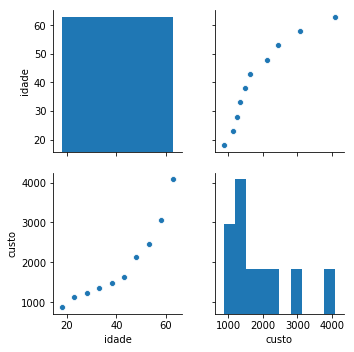

In [58]:
sns.pairplot(df);

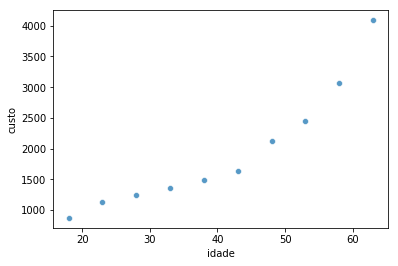

In [64]:
sns.scatterplot(x="idade", y="custo", data=df, alpha=0.75);


### Verificando o como o modelo se saiu

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    confusion_matrix(y_test, y_pred)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
plot_confusion_matrix_2(y_test, y_pred, normalize=True);

### Agora, usando validação cruzada.

In [ ]:
classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classificador.fit(x, y)

resultados = cross_val_score(classificador, x, y, cv = 200)

classe = y.values

print("Acurácia média: {:.3} ± {:.3}.".format(resultados.mean(), resultados.std()))